In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rows_to_keep = [5,6]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# File Prepping

## DOH Data

In [7]:
sheets_metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 02 Metadata - Sheets.csv')
fields_metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 03 Metadata - Fields.csv')
cases_b0 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_0.csv', low_memory = False)
cases_b1 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_1.csv', low_memory = False)
cases_b2 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_2.csv', low_memory = False)
cases_b3 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_3.csv', low_memory = False)
dailyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 05 DOH Data Collect - Daily Report.csv')
weeklyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 06 DOH Data Collect - Weekly Report.csv')
testing_aggregates = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 07 Testing Aggregates.csv')
baseline = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 10 DOH Data Collect v8 - Baseline.csv', low_memory = False)

# Combine all case batches
cases = pd.concat([cases_b1, cases_b2, cases_b3])

# Get only useful data from dailyreport
dailyreport = dailyreport[['reportdate', 'region', 'province', 'city_mun', 'conf_asym', 'conf_mild', 'conf_severe', 'conf_crit', 'conf_mod']]

### Filtering out to Marikina

In [8]:
# Convert dates from objects/strings to datetime
dailyreport['reportdate'] = pd.to_datetime(dailyreport['reportdate'])
cases['DateRepConf'] = pd.to_datetime(cases['DateRepConf'])

# Filetering out to only Marikina
marikina = dailyreport[dailyreport['city_mun'] == 'CITY OF MARIKINA']
marikina_cases = cases[cases['CityMunRes'] == 'CITY OF MARIKINA']
marikina_cases = marikina_cases.reset_index().drop('index', axis=1)

## NetLogo Data

### Spread of Disease

#### Reading Spread of Disease Data per scenario

In [395]:
# Test Runs
sodA = pd.read_csv('00 Practice Tests\Test-12\Test 12A - Galvez\Test 12A Galvez - Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sodB = pd.read_csv('00 Practice Tests\Test-12\Test 12B - Galvez\Test 12B Galvez - Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sodC = pd.read_csv('00 Practice Tests\Test-12\Test 12C - Salmingo\Test 12C Salmingo - Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
#sod_D1NULL_3mins = pd.read_csv('01 D-1-NULL-3mins\D-1-NULL-3mins Spread of Disease.csv', skiprows=19, usecols=[0,1,5,9,13])

# -----------Delta Scenarios----------
sod_D1NULL = pd.read_csv(r'01 Test 1 Runs\05 D-1-NULL-Test1\D-1-NULL-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D1INAC = pd.read_csv(r'01 Test 1 Runs\06 D-1-INAC-Test1\D-1-INAC-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D1VIRA = pd.read_csv(r'01 Test 1 Runs\07 D-1-VIRA-Test1\D-1-VIRA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D1MRNA = pd.read_csv(r'01 Test 1 Runs\08 D-1-MRNA-Test1\D-1-MRNA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])

sod_D23NULL = pd.read_csv(r'01 Test 1 Runs\09 D-23-NULL-Test1\D-23-NULL-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D23INAC = pd.read_csv(r'01 Test 1 Runs\10 D-23-INAC-Test1\D-23-INAC-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D23VIRA = pd.read_csv(r'01 Test 1 Runs\11 D-23-VIRA-Test1\D-23-VIRA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D23MRNA = pd.read_csv(r'01 Test 1 Runs\12 D-23-MRNA-Test1\D-23-MRNA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])

sod_D45NULL = pd.read_csv(r'01 Test 1 Runs\13 D-45-NULL-Test1\D-45-NULL-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D45INAC = pd.read_csv(r'01 Test 1 Runs\14 D-45-INAC-Test1\D-45-INAC-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D45VIRA = pd.read_csv(r'01 Test 1 Runs\15 D-45-VIRA-Test1\D-45-VIRA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D45MRNA = pd.read_csv(r'01 Test 1 Runs\16 D-45-MRNA-Test1\D-45-MRNA-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])

# --------------Non-Delta Scenarios---------
sod_ND1NULL = pd.read_csv(r'01 Test 1 Runs\21 ND-1-NULL-Test1\ND-1-NULL-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND1INAC = pd.read_csv(r'01 Test 1 Runs\22 ND-1-INAC-Test1\ND-1-INAC-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND1VIRA = pd.read_csv(r'01 Test 1 Runs\23 ND-1-VIRA-Test1\ND-1-VIRA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND1MRNA = pd.read_csv(r'01 Test 1 Runs\24 ND-1-MRNA-Test1\ND-1-MRNA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])

sod_ND23NULL = pd.read_csv(r'01 Test 1 Runs\25 ND-23-NULL-Test1\ND-23-NULL-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND23INAC = pd.read_csv(r'01 Test 1 Runs\26 ND-23-INAC-Test1\ND-23-INAC-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND23VIRA = pd.read_csv(r'01 Test 1 Runs\27 ND-23-VIRA-Test1\ND-23-VIRA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND23MRNA = pd.read_csv(r'01 Test 1 Runs\28 ND-23-MRNA-Test1\ND-23-MRNA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])

sod_ND45NULL = pd.read_csv(r'01 Test 1 Runs\29 ND-45-NULL-Test1\ND-45-NULL-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND45INAC = pd.read_csv(r'01 Test 1 Runs\30 ND-45-INAC-Test1\ND-45-INAC-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND45VIRA = pd.read_csv(r'01 Test 1 Runs\31 ND-45-VIRA-Test1\ND-45-VIRA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])
sod_ND45MRNA = pd.read_csv(r'01 Test 1 Runs\32 ND-45-MRNA-Test1\ND-45-MRNA-Test1 Spread of Disease.csv', skiprows = 20, usecols=[0,1,5,9,13])

#-------------Test Runs----------------
sod_D45AVER99 = pd.read_csv(r'00 Practice Tests\D-45-AVER Vx99per\D-45-AVER Vx99per Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])
sod_D45AVER1PD = pd.read_csv(r'00 Practice Tests\D-45-AVER-Vx1PD\D-45-AVER-Vx1PD Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9,13])

sod_ZZD45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-New\D-45-AVER-New Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])

sod_99D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-99\D-45-AVER-99 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])
sod_75D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-75\D-45-AVER-75 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])
sod_50D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-50\D-45-AVER-50 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])
sod_25D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-25\D-45-AVER-25 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])
sod_00D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-00\D-45-AVER-00 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])

sod_DAUTONULL_Test1 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test1\D-AUTO-NULL-Test1 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])
sod_DAUTONULL_Test2 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test2\D-AUTO-NULL-Test2 Spread of Disease.csv', skiprows=20, usecols=[0,1,5,9])

#### Renaming Columns

In [396]:
sod_columns = {'days', 'asym', 'moderate', 'severe', 'mild'}


#-----------------Delta Scenarios------------------
sod_D1NULL.columns = list(sod_columns)
sod_D1INAC.columns = list(sod_columns)
sod_D1VIRA.columns = list(sod_columns)
sod_D1MRNA.columns = list(sod_columns)

sod_D23NULL.columns = list(sod_columns)
sod_D23INAC.columns = list(sod_columns)
sod_D23VIRA.columns = list(sod_columns)
sod_D23MRNA.columns = list(sod_columns)

sod_D45NULL.columns = list(sod_columns)
sod_D45INAC.columns = list(sod_columns)
sod_D45VIRA.columns = list(sod_columns)
sod_D45MRNA.columns = list(sod_columns)

#------------------Non-Delta Scenarios-----------------
sod_ND1NULL.columns = list(sod_columns)
sod_ND1INAC.columns = list(sod_columns)
sod_ND1VIRA.columns = list(sod_columns)
sod_ND1MRNA.columns = list(sod_columns)

sod_ND23NULL.columns = list(sod_columns)
sod_ND23INAC.columns = list(sod_columns)
sod_ND23VIRA.columns = list(sod_columns)
sod_ND23MRNA.columns = list(sod_columns)

sod_ND45NULL.columns = list(sod_columns)
sod_ND45INAC.columns = list(sod_columns)
sod_ND45VIRA.columns = list(sod_columns)
sod_ND45MRNA.columns = list(sod_columns)

#----------------Test Runs---------------
#sod_D1NULL_3mins.columns = list(columns)
sodA.columns = list(sod_columns)
sodB.columns = list(sod_columns)
sodC.columns = list(sod_columns)

sod_D45AVER99.columns = list(sod_columns)
sod_D45AVER1PD.columns = list(sod_columns)

sod_ZZD45AVER.columns = ['days', 'asym', 'moderate', 'severe']

sod_99D45AVER.columns = ['days', 'asym', 'moderate', 'severe']
sod_75D45AVER.columns = ['days', 'asym', 'moderate', 'severe']
sod_50D45AVER.columns = ['days', 'asym', 'moderate', 'severe']
sod_25D45AVER.columns = ['days', 'asym', 'moderate', 'severe']
sod_00D45AVER.columns = ['days', 'asym', 'moderate', 'severe']

sod_DAUTONULL_Test1.columns = ['days', 'asym', 'moderate', 'severe']
sod_DAUTONULL_Test2.columns = ['days', 'asym', 'moderate', 'severe']

#### Ticks to Days

In [397]:
# Ticks Represents in minutes
delta_ticks_to_days = int(1440/10)
nondelta_ticks_to_days = int(1440/3)

#--------------Delta Scenarios----------------------------------
sod_days_D1NULL = sod_D1NULL.iloc[1::delta_ticks_to_days, :]
sod_days_D1INAC = sod_D1INAC.iloc[1::delta_ticks_to_days, :]
sod_days_D1VIRA = sod_D1VIRA.iloc[1::delta_ticks_to_days, :]
sod_days_D1MRNA = sod_D1MRNA.iloc[1::delta_ticks_to_days, :]

sod_days_D23NULL = sod_D23NULL.iloc[1::delta_ticks_to_days, :]
sod_days_D23INAC = sod_D23INAC.iloc[1::delta_ticks_to_days, :]
sod_days_D23VIRA = sod_D23VIRA.iloc[1::delta_ticks_to_days, :]
sod_days_D23MRNA = sod_D23MRNA.iloc[1::delta_ticks_to_days, :]

sod_days_D45NULL = sod_D45NULL.iloc[1::delta_ticks_to_days, :]
sod_days_D45INAC = sod_D45INAC.iloc[1::delta_ticks_to_days, :]
sod_days_D45VIRA = sod_D45VIRA.iloc[1::delta_ticks_to_days, :]
sod_days_D45MRNA = sod_D45MRNA.iloc[1::delta_ticks_to_days, :]

#---------------------Non-Delta Scenarios------------------
sod_days_ND1NULL = sod_ND1NULL.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND1INAC = sod_ND1INAC.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND1VIRA = sod_ND1VIRA.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND1MRNA = sod_ND1MRNA.iloc[1::nondelta_ticks_to_days, :]

sod_days_ND23NULL = sod_ND23NULL.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND23INAC = sod_ND23INAC.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND23VIRA = sod_ND23VIRA.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND23MRNA = sod_ND23MRNA.iloc[1::nondelta_ticks_to_days, :]

sod_days_ND45NULL = sod_ND45NULL.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND45INAC = sod_ND45INAC.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND45VIRA = sod_ND45VIRA.iloc[1::nondelta_ticks_to_days, :]
sod_days_ND45MRNA = sod_ND45MRNA.iloc[1::nondelta_ticks_to_days, :]

#---------------Test Runs-----------------
#sod_days_D1NULL_3mins = sod_D1NULL_3mins.iloc[1::delta_ticks_to_days, :]
sod_days_A = sodA.iloc[1::delta_ticks_to_days, :]
sod_days_B = sodB.iloc[1::delta_ticks_to_days, :]
sod_days_C = sodC.iloc[1::delta_ticks_to_days, :]

sod_days_D45AVER99 = sod_D45AVER99.iloc[1::delta_ticks_to_days, :]
sod_days_D45AVER1PD = sod_D45AVER1PD.iloc[1::delta_ticks_to_days, :]

sod_days_ZZD45AVER = sod_ZZD45AVER.iloc[1::delta_ticks_to_days, :]

sod_days_99D45AVER = sod_99D45AVER.iloc[1::delta_ticks_to_days, :]
sod_days_75D45AVER = sod_75D45AVER.iloc[1::delta_ticks_to_days, :]
sod_days_50D45AVER = sod_50D45AVER.iloc[1::delta_ticks_to_days, :]
sod_days_25D45AVER = sod_25D45AVER.iloc[1::delta_ticks_to_days, :]
sod_days_00D45AVER = sod_00D45AVER.iloc[1::delta_ticks_to_days, :]

sod_days_DAUTONULL_Test1 = sod_DAUTONULL_Test1.iloc[1::delta_ticks_to_days, :]
sod_days_DAUTONULL_Test2 = sod_DAUTONULL_Test2.iloc[1::delta_ticks_to_days, :]

In [409]:
sod = pd.concat((sod_days_DAUTONULL_Test1, sod_days_DAUTONULL_Test2))
sod_by_row_index = sod.groupby(sod.index)
sod_days_DAUTONULL = sod_by_row_index.mean()

### Active Cases

#### Reading Active Cases per scenario

In [410]:
#-----Delta Scenarios-----
ac_D1NULL = pd.read_csv(r'01 Test 1 Runs\05 D-1-NULL-Test1\D-1-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D1INAC = pd.read_csv(r'01 Test 1 Runs\06 D-1-INAC-Test1\D-1-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D1VIRA = pd.read_csv(r'01 Test 1 Runs\07 D-1-VIRA-Test1\D-1-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D1MRNA = pd.read_csv(r'01 Test 1 Runs\08 D-1-MRNA-Test1\D-1-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_D23NULL = pd.read_csv(r'01 Test 1 Runs\09 D-23-NULL-Test1\D-23-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D23INAC = pd.read_csv(r'01 Test 1 Runs\10 D-23-INAC-Test1\D-23-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D23VIRA = pd.read_csv(r'01 Test 1 Runs\11 D-23-VIRA-Test1\D-23-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D23MRNA = pd.read_csv(r'01 Test 1 Runs\12 D-23-MRNA-Test1\D-23-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_D45NULL = pd.read_csv(r'01 Test 1 Runs\13 D-45-NULL-Test1\D-45-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D45INAC = pd.read_csv(r'01 Test 1 Runs\14 D-45-INAC-Test1\D-45-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D45VIRA = pd.read_csv(r'01 Test 1 Runs\15 D-45-VIRA-Test1\D-45-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D45MRNA = pd.read_csv(r'01 Test 1 Runs\16 D-45-MRNA-Test1\D-45-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

#-----Non-Delta Scenarios-----
ac_ND1NULL = pd.read_csv(r'01 Test 1 Runs\21 ND-1-NULL-Test1\ND-1-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND1INAC = pd.read_csv(r'01 Test 1 Runs\22 ND-1-INAC-Test1\ND-1-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND1VIRA = pd.read_csv(r'01 Test 1 Runs\23 ND-1-VIRA-Test1\ND-1-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND1MRNA = pd.read_csv(r'01 Test 1 Runs\24 ND-1-MRNA-Test1\ND-1-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_ND23NULL = pd.read_csv(r'01 Test 1 Runs\25 ND-23-NULL-Test1\ND-23-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND23INAC = pd.read_csv(r'01 Test 1 Runs\26 ND-23-INAC-Test1\ND-23-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND23VIRA = pd.read_csv(r'01 Test 1 Runs\27 ND-23-VIRA-Test1\ND-23-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND23MRNA = pd.read_csv(r'01 Test 1 Runs\28 ND-23-MRNA-Test1\ND-23-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_ND45NULL = pd.read_csv(r'01 Test 1 Runs\29 ND-45-NULL-Test1\ND-45-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND45INAC = pd.read_csv(r'01 Test 1 Runs\30 ND-45-INAC-Test1\ND-45-INAC-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND45VIRA = pd.read_csv(r'01 Test 1 Runs\31 ND-45-VIRA-Test1\ND-45-VIRA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_ND45MRNA = pd.read_csv(r'01 Test 1 Runs\32 ND-45-MRNA-Test1\ND-45-MRNA-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

#-------Test Cases------------
ac_D45AVER99 = pd.read_csv(r'00 Practice Tests\D-45-AVER Vx99per\D-45-AVER Vx99per Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_D45AVER1PD = pd.read_csv(r'00 Practice Tests\D-45-AVER-Vx1PD\D-45-AVER-Vx1PD Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_ZZD45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-New\D-45-AVER-New Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_99D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-99\D-45-AVER-99 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_75D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-75\D-45-AVER-75 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_50D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-50\D-45-AVER-50 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_25D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-25\D-45-AVER-25 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_00D45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-00\D-45-AVER-00 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

ac_DAUTONULL_Test1 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test1\D-AUTO-NULL-Test1 Daily Active Cases.csv', skiprows=19, usecols=[0,1])
ac_DAUTONULL_Test2 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test2\D-AUTO-NULL-Test2 Daily Active Cases.csv', skiprows=19, usecols=[0,1])

#### Renaming Columns

In [411]:
ac_columns = {'days', 'cases'}

#-----------Delta Scenarios-----------------

ac_D1NULL.columns = list(ac_columns)
ac_D1INAC.columns = list(ac_columns)
ac_D1VIRA.columns = list(ac_columns)
ac_D1MRNA.columns = list(ac_columns)

ac_D23NULL.columns = list(ac_columns)
ac_D23INAC.columns = list(ac_columns)
ac_D23VIRA.columns = list(ac_columns)
ac_D23MRNA.columns = list(ac_columns)

ac_D45NULL.columns = list(ac_columns)
ac_D45INAC.columns = list(ac_columns)
ac_D45VIRA.columns = list(ac_columns)
ac_D45MRNA.columns = list(ac_columns)


#----------Non-Delta Scenarios------------------
ac_ND1NULL.columns = list(ac_columns)
ac_ND1NULL.columns = list(ac_columns)
ac_ND1NULL.columns = list(ac_columns)
ac_ND1NULL.columns = list(ac_columns)

ac_ND23NULL.columns = list(ac_columns)
ac_ND23INAC.columns = list(ac_columns)
ac_ND23VIRA.columns = list(ac_columns)
ac_ND23MRNA.columns = list(ac_columns)

ac_ND45NULL.columns = list(ac_columns)
ac_ND45INAC.columns = list(ac_columns)
ac_ND45VIRA.columns = list(ac_columns)
ac_ND45MRNA.columns = list(ac_columns)

#----------Test Runs----------------------------
ac_D45AVER99.columns = list(ac_columns)
ac_D45AVER1PD.columns = list(ac_columns)

ac_ZZD45AVER.columns = list(ac_columns)

ac_99D45AVER.columns = list(ac_columns)
ac_75D45AVER.columns = list(ac_columns)
ac_50D45AVER.columns= list(ac_columns)
ac_25D45AVER.columns= list(ac_columns)
ac_00D45AVER.columns= list(ac_columns)

ac_DAUTONULL_Test1.columns = list(ac_columns)
ac_DAUTONULL_Test2.columns = list(ac_columns)

#### Ticks to Days

In [412]:
delta_ticks_to_days = int(1440/10)
nondelta_ticks_to_days = int(1440/3)

#---------------------Delta Scenarios--------------------

ac_days_D1NULL = ac_D1NULL.iloc[1::delta_ticks_to_days, :]
ac_days_D1INAC = ac_D1INAC.iloc[1::delta_ticks_to_days, :]
ac_days_D1VIRA = ac_D1VIRA.iloc[1::delta_ticks_to_days, :]
ac_days_D1MRNA = ac_D1MRNA.iloc[1::delta_ticks_to_days, :]

ac_days_D23NULL = ac_D23NULL.iloc[1::delta_ticks_to_days, :]
ac_days_D23INAC = ac_D23INAC.iloc[1::delta_ticks_to_days, :]
ac_days_D23VIRA = ac_D23VIRA.iloc[1::delta_ticks_to_days, :]
ac_days_D23MRNA = ac_D23MRNA.iloc[1::delta_ticks_to_days, :]

ac_days_D45NULL = ac_D45NULL.iloc[1::delta_ticks_to_days, :]
ac_days_D45INAC = ac_D45INAC.iloc[1::delta_ticks_to_days, :]
ac_days_D45VIRA = ac_D45VIRA.iloc[1::delta_ticks_to_days, :]
ac_days_D45MRNA = ac_D45MRNA.iloc[1::delta_ticks_to_days, :]

#-------------------Non-Delta Scenarios-------------------------

ac_days_ND1NULL = ac_ND1NULL.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND1INAC = ac_ND1INAC.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND1VIRA = ac_ND1VIRA.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND1MRNA = ac_ND1MRNA.iloc[1::nondelta_ticks_to_days, :]

ac_days_ND23NULL = ac_ND23NULL.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND23INAC = ac_ND23INAC.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND23VIRA = ac_ND23VIRA.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND23MRNA = ac_ND23MRNA.iloc[1::nondelta_ticks_to_days, :]

ac_days_ND45NULL = ac_ND45NULL.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND45INAC = ac_ND45INAC.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND45VIRA = ac_ND45VIRA.iloc[1::nondelta_ticks_to_days, :]
ac_days_ND45MRNA = ac_ND45MRNA.iloc[1::nondelta_ticks_to_days, :]

#-----------------Test Runs------------------------------

ac_days_D45AVER99 = ac_D45AVER99.iloc[1::delta_ticks_to_days, :]
ac_days_D45AVER1PD = ac_D45AVER1PD.iloc[1::delta_ticks_to_days, :]
ac_days_ZZD45AVER = ac_ZZD45AVER.iloc[1::delta_ticks_to_days, :]

ac_days_99D45AVER = ac_99D45AVER.iloc[1::delta_ticks_to_days, :]
ac_days_75D45AVER = ac_75D45AVER.iloc[1::delta_ticks_to_days, :]
ac_days_50D45AVER = ac_50D45AVER.iloc[1::delta_ticks_to_days, :]
ac_days_25D45AVER = ac_25D45AVER.iloc[1::delta_ticks_to_days, :]
ac_days_00D45AVER = ac_00D45AVER.iloc[1::delta_ticks_to_days, :]

ac_days_DAUTONULL_Test1 = ac_DAUTONULL_Test1.iloc[1::delta_ticks_to_days, :]
ac_days_DAUTONULL_Test2 = ac_DAUTONULL_Test2.iloc[1::delta_ticks_to_days, :]

In [413]:
# Averaging out the three SODs
#sod = pd.concat((sod_days_A, sod_days_B, sod_days_C))
#by_row_index = sod.groupby(sod.index)
#sod_means = by_row_index.mean()

In [431]:
placeholder = pd.concat((ac_days_DAUTONULL_Test1, ac_days_DAUTONULL_Test2))
ac_by_row_index = placeholder.groupby(placeholder.index)
ac_days_DAUTONULL = ac_by_row_index.mean()

### Daily Deaths

#### Reading Daily Deaths per Scenario

In [432]:
#-----Delta Scenarios-----
#ac_D0NULL = pd.read_csv(r'01 Test 1 Runs\01 D-0-NULL-Test1\D-0-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
#ac_D0INAC = pd.read_csv(r'01 Test 1 Runs\02 D-0-INAC-Test1\D-0-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
#ac_D0VIRA = pd.read_csv(r'01 Test 1 Runs\03 D-0-VIRA-Test1\D-0-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
#ac_D0MRNA = pd.read_csv(r'01 Test 1 Runs\04 D-0-MRNA-Test1\D-0-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_D1NULL = pd.read_csv(r'01 Test 1 Runs\05 D-1-NULL-Test1\D-1-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D1INAC = pd.read_csv(r'01 Test 1 Runs\06 D-1-INAC-Test1\D-1-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D1VIRA = pd.read_csv(r'01 Test 1 Runs\07 D-1-VIRA-Test1\D-1-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D1MRNA = pd.read_csv(r'01 Test 1 Runs\08 D-1-MRNA-Test1\D-1-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_D23NULL = pd.read_csv(r'01 Test 1 Runs\09 D-23-NULL-Test1\D-23-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D23INAC = pd.read_csv(r'01 Test 1 Runs\10 D-23-INAC-Test1\D-23-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D23VIRA = pd.read_csv(r'01 Test 1 Runs\11 D-23-VIRA-Test1\D-23-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D23MRNA = pd.read_csv(r'01 Test 1 Runs\12 D-23-MRNA-Test1\D-23-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_D45NULL = pd.read_csv(r'01 Test 1 Runs\13 D-45-NULL-Test1\D-45-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D45INAC = pd.read_csv(r'01 Test 1 Runs\14 D-45-INAC-Test1\D-45-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D45VIRA = pd.read_csv(r'01 Test 1 Runs\15 D-45-VIRA-Test1\D-45-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D45MRNA = pd.read_csv(r'01 Test 1 Runs\16 D-45-MRNA-Test1\D-45-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

#-----Non-Delta Scenarios-----
dd_ND0NULL = pd.read_csv(r'01 Test 1 Runs\17 ND-0-NULL-Test1\ND-0-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND0INAC = pd.read_csv(r'01 Test 1 Runs\18 ND-0-INAC-Test1\ND-0-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
#ac_ND0VIRA = pd.read_csv(r'01 Test 1 Runs\19 ND-0-VIRA-Test1\ND-0-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
#ac_ND0MRNA = pd.read_csv(r'01 Test 1 Runs\20 ND-0-MRNA-Test1\ND-0-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_ND1NULL = pd.read_csv(r'01 Test 1 Runs\21 ND-1-NULL-Test1\ND-1-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND1INAC = pd.read_csv(r'01 Test 1 Runs\22 ND-1-INAC-Test1\ND-1-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND1VIRA = pd.read_csv(r'01 Test 1 Runs\23 ND-1-VIRA-Test1\ND-1-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND1MRNA = pd.read_csv(r'01 Test 1 Runs\24 ND-1-MRNA-Test1\ND-1-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_ND23NULL = pd.read_csv(r'01 Test 1 Runs\25 ND-23-NULL-Test1\ND-23-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND23INAC = pd.read_csv(r'01 Test 1 Runs\26 ND-23-INAC-Test1\ND-23-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND23VIRA = pd.read_csv(r'01 Test 1 Runs\27 ND-23-VIRA-Test1\ND-23-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND23MRNA = pd.read_csv(r'01 Test 1 Runs\28 ND-23-MRNA-Test1\ND-23-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_ND45NULL = pd.read_csv(r'01 Test 1 Runs\29 ND-45-NULL-Test1\ND-45-NULL-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND45INAC = pd.read_csv(r'01 Test 1 Runs\30 ND-45-INAC-Test1\ND-45-INAC-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND45VIRA = pd.read_csv(r'01 Test 1 Runs\31 ND-45-VIRA-Test1\ND-45-VIRA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_ND45MRNA = pd.read_csv(r'01 Test 1 Runs\32 ND-45-MRNA-Test1\ND-45-MRNA-Test1 Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_D45AVER99 = pd.read_csv(r'00 Practice Tests\D-45-AVER Vx99per\D-45-AVER Vx99per Daily Deaths.csv', skiprows=19, usecols=[0,1])
dd_D45AVER1PD = pd.read_csv(r'00 Practice Tests\D-45-AVER-Vx1PD\D-45-AVER-Vx1PD Daily Deaths.csv', skiprows=19, usecols=[0,1])

dd_ZZD45AVER = pd.read_csv(r'00 Practice Tests\ZZ D-45-AVER-NEW\D-45-AVER-New Daily Deaths.csv', skiprows=19, usecols=[0,1])

#### Renaming Columns

In [433]:
dd_columns = {'days', 'deaths'}

#ac_D0NULL.columns = list(ac_columns)
#ac_D0INAC.columns = list(ac_columns)
#ac_D0VIRA.columns = list(ac_columns)
#ac_D0MRNA.columns = list(ac_columns)

dd_D1NULL.columns = list(dd_columns)
dd_D1INAC.columns = list(dd_columns)
dd_D1VIRA.columns = list(dd_columns)
dd_D1MRNA.columns = list(dd_columns)

dd_D23NULL.columns = list(dd_columns)
dd_D23INAC.columns = list(dd_columns)
dd_D23VIRA.columns = list(dd_columns)
dd_D23MRNA.columns = list(dd_columns)

dd_D45NULL.columns = list(dd_columns)
dd_D45INAC.columns = list(dd_columns)
dd_D45VIRA.columns = list(dd_columns)
dd_D45MRNA.columns = list(dd_columns)


dd_ND0NULL.columns = list(dd_columns)
dd_ND0INAC.columns = list(dd_columns)
#dd_ND0VIRA.columns = list(dd_columns)
#dd_ND0MRNA.columns = list(dd_columns)

dd_ND1NULL.columns = list(dd_columns)
dd_ND1NULL.columns = list(dd_columns)
dd_ND1NULL.columns = list(dd_columns)
dd_ND1NULL.columns = list(dd_columns)

dd_ND23NULL.columns = list(dd_columns)
dd_ND23INAC.columns = list(dd_columns)
dd_ND23VIRA.columns = list(dd_columns)
dd_ND23MRNA.columns = list(dd_columns)

dd_ND45NULL.columns = list(dd_columns)
dd_ND45INAC.columns = list(dd_columns)
dd_ND45VIRA.columns = list(dd_columns)
dd_ND45MRNA.columns = list(dd_columns)

dd_D45AVER99.columns = list(dd_columns)
dd_D45AVER1PD.columns = list(dd_columns)
dd_ZZD45AVER.columns = list(dd_columns)

#### Ticks to Days

In [434]:
delta_ticks_to_days = int(1440/10)
nondelta_ticks_to_days = int(1440/3)

#ac_days_D0NULL = ac_D0NULL.iloc[1::delta_ticks_to_days, :]
#ac_days_D0INAC = ac_D0INAC.iloc[1::delta_ticks_to_days, :]
#ac_days_D0VIRA = ac_D0VIRA.iloc[1::delta_ticks_to_days, :]
#ac_days_D0MRNA = ac_D0MRNA.iloc[1::delta_ticks_to_days, :]

dd_days_D1NULL = dd_D1NULL.iloc[1::delta_ticks_to_days, :]
dd_days_D1INAC = dd_D1INAC.iloc[1::delta_ticks_to_days, :]
dd_days_D1VIRA = dd_D1VIRA.iloc[1::delta_ticks_to_days, :]
dd_days_D1MRNA = dd_D1MRNA.iloc[1::delta_ticks_to_days, :]

dd_days_D23NULL = dd_D23NULL.iloc[1::delta_ticks_to_days, :]
dd_days_D23INAC = dd_D23INAC.iloc[1::delta_ticks_to_days, :]
dd_days_D23VIRA = dd_D23VIRA.iloc[1::delta_ticks_to_days, :]
dd_days_D23MRNA = dd_D23MRNA.iloc[1::delta_ticks_to_days, :]

dd_days_D45NULL = dd_D45NULL.iloc[1::delta_ticks_to_days, :]
dd_days_D45INAC = dd_D45INAC.iloc[1::delta_ticks_to_days, :]
dd_days_D45VIRA = dd_D45VIRA.iloc[1::delta_ticks_to_days, :]
dd_days_D45MRNA = dd_D45MRNA.iloc[1::delta_ticks_to_days, :]


dd_days_ND0NULL = dd_ND0NULL.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND0INAC = dd_ND0INAC.iloc[1::nondelta_ticks_to_days, :]
#dd_days_ND0VIRA = dd_ND0VIRA.iloc[1::nondelta_ticks_to_days, :]
#dd_days_ND0MRNA = dd_ND0MRNA.iloc[1::nondelta_ticks_to_days, :]

dd_days_ND1NULL = dd_ND1NULL.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND1INAC = dd_ND1INAC.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND1VIRA = dd_ND1VIRA.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND1MRNA = dd_ND1MRNA.iloc[1::nondelta_ticks_to_days, :]

dd_days_ND23NULL = dd_ND23NULL.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND23INAC = dd_ND23INAC.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND23VIRA = dd_ND23VIRA.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND23MRNA = dd_ND23MRNA.iloc[1::nondelta_ticks_to_days, :]

dd_days_ND45NULL = dd_ND45NULL.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND45INAC = dd_ND45INAC.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND45VIRA = dd_ND45VIRA.iloc[1::nondelta_ticks_to_days, :]
dd_days_ND45MRNA = dd_ND45MRNA.iloc[1::nondelta_ticks_to_days, :]

dd_days_D45AVER99 = dd_D45AVER99.iloc[1::delta_ticks_to_days, :]
dd_days_D45AVER1PD = dd_D45AVER1PD.iloc[1::delta_ticks_to_days, :]

dd_days_ZZD45AVER = dd_ZZD45AVER.iloc[1::delta_ticks_to_days, :]

In [462]:
alert_DAUTONULL_Test1 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test1\D-AUTO-NULL-Test1 Alert Level Change.csv', skiprows=17, usecols=[0,1])
alert_DAUTONULL_Test2 = pd.read_csv(r'00 Practice Tests\XX D-AUTO-NULL-Test2\D-AUTO-NULL-Test2 Alert Level Change.csv', skiprows=17, usecols=[0,1])

alert_DAUTONULL_Test1.columns = ['days', 'alert_level']
alert_DAUTONULL_Test2.columns = ['days', 'alert_level']

alert_days_DAUTONULL_Test1 = alert_DAUTONULL_Test1.iloc[1::delta_ticks_to_days, :]
alert_days_DAUTONULL_Test2 = alert_DAUTONULL_Test2.iloc[1::delta_ticks_to_days, :]

In [463]:
alert_days_DAUTONULL_Test1.head()

,days,alert_level
1,1,1
145,2,1
289,3,1
433,4,1
577,5,1


In [ ]:
alert_

# Metadata
### What do the headers mean?

Refer to Index [47-69] for the cases 

In [441]:
sheets_metadata;

# Markina Data from Aug 1, 2021 to Dec 12, 2021

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [442]:
start_date = '2021-08-01'
end_date = '2021-12-15'

In [443]:
marikina_mask = (marikina['reportdate'] >= start_date) & (marikina['reportdate'] <= end_date)

In [444]:
marikina_date = marikina.loc[marikina_mask].groupby([marikina['reportdate'].dt.date]).sum()

In [445]:
marikina_date['conf_cases'] = marikina_date['conf_asym'] + marikina_date['conf_mild'] + marikina_date['conf_severe'] + marikina_date['conf_crit'] + marikina_date['conf_mod']

In [446]:
marikina_date.reset_index().index;

# Graphing

## Scaling

In [447]:
#Scale NetLogo data to fit DOH graph
scale_factor = 1.05

df = sod_days_ZZD45AVER.drop('days', axis=1)
sod_scaled = df * scale_factor
sod_scaled = pd.concat((sod_scaled, sod_days_ZZD45AVER.days), 1)

C:\Users\Daft\AppData\Local\Temp\ipykernel_44328\2238144562.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sod_scaled = pd.concat((sod_scaled, sod_days_ZZD45AVER.days), 1)


## Active Cases

### Change This Value to Graph

In [448]:
ac_graph = ac_days_ND45

NameError: name 'ac_days_ND45' is not defined

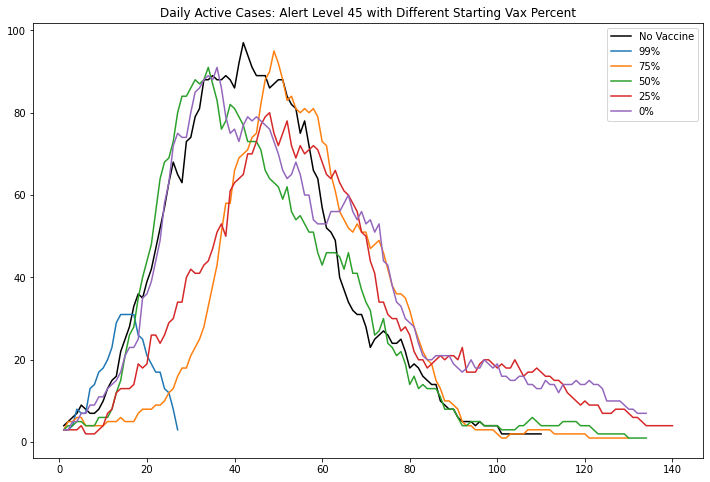

In [449]:
plt.figure(figsize=(12,8))
plt.plot(ac_days_D45NULL.days, ac_days_D45NULL.cases, color="black")
plt.plot(ac_days_99D45AVER.days, ac_days_99D45AVER.cases, color="tab:blue")
plt.plot(ac_days_75D45AVER.days, ac_days_75D45AVER.cases, color='tab:orange')
plt.plot(ac_days_50D45AVER.days, ac_days_50D45AVER.cases, color="tab:green")
plt.plot(ac_days_25D45AVER.days, ac_days_25D45AVER.cases, color="tab:red")
plt.plot(ac_days_00D45AVER.days, ac_days_00D45AVER.cases, color="tab:purple")


plt.title('Daily Active Cases: Alert Level 45 with Different Starting Vax Percent')
#plt.legend(['Alert Level 1', 'Alert Levels 2&3', 'Alert Levels 4&5'])
plt.legend(['No Vaccine', '99%', '75%', '50%', '25%', '0%'])
plt.show()

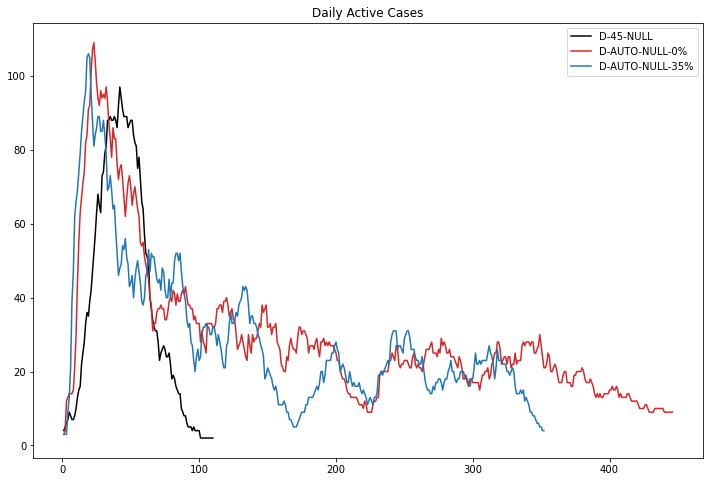

In [452]:
plt.figure(figsize=(12,8))
plt.plot(ac_days_D45NULL.days, ac_days_D45NULL.cases, color="black")
plt.plot(ac_days_DAUTONULL_Test1.days, ac_days_DAUTONULL_Test1.cases, color="tab:red")
plt.plot(ac_days_DAUTONULL_Test2.days, ac_days_DAUTONULL_Test2.cases, color="tab:blue")

plt.title('Daily Active Cases')
#plt.legend(['Alert Level 1', 'Alert Levels 2&3', 'Alert Levels 4&5'])
plt.legend(['D-45-NULL', 'D-AUTO-NULL-0%', 'D-AUTO-NULL-35%'])
plt.show()

## Spread of Disease

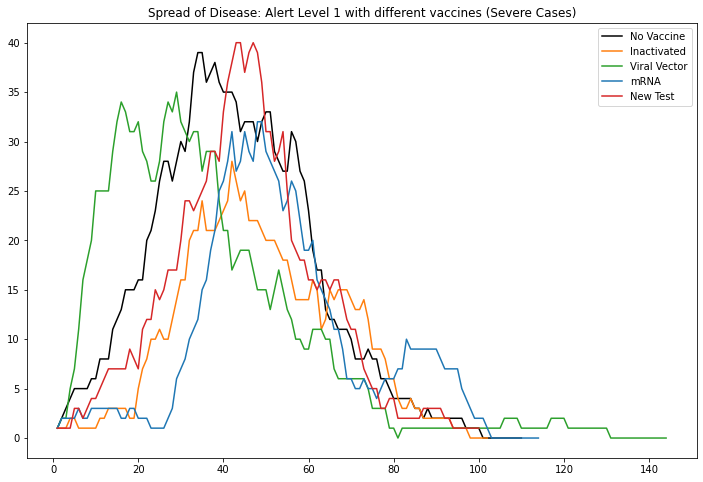

In [286]:
plt.figure(figsize=(12,8))

plt.plot(sod_days_D45NULL.days, sod_days_D45NULL.severe, color="black")
plt.plot(sod_days_D45INAC.days, sod_days_D45INAC.severe, color="tab:orange")
plt.plot(sod_days_D45VIRA.days, sod_days_D45VIRA.severe, color="tab:green")
plt.plot(sod_days_D45MRNA.days, sod_days_D45MRNA.severe, color="tab:blue")
plt.plot(sod_days_ZZD45AVER.days, sod_days_ZZD45AVER.severe, color="tab:red")


plt.legend(['No Vaccine', 'Inactivated', 'Viral Vector', 'mRNA', 'New Test'])

plt.title('Spread of Disease: Alert Level 1 with different vaccines (Severe Cases)')
plt.show()

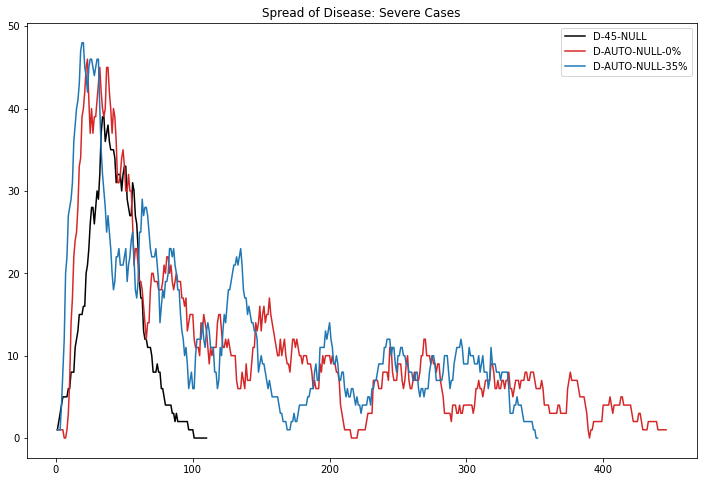

In [455]:
plt.figure(figsize=(12,8))

plt.plot(sod_days_D45NULL.days, sod_days_D45NULL.severe, color="black")
plt.plot(sod_days_DAUTONULL_Test1.days, sod_days_DAUTONULL_Test1.severe, color="tab:red")
plt.plot(sod_days_DAUTONULL_Test2.days, sod_days_DAUTONULL_Test2.severe, color="tab:blue")


plt.legend(['D-45-NULL', 'D-AUTO-NULL-0%', 'D-AUTO-NULL-35%'])

plt.title('Spread of Disease: Severe Cases')
plt.show()

In [354]:
percent_severe_99 = (sod_days_D45AVER99.severe.max() / ac_days_D45AVER99.cases.max()) * 100
percent_severe_1PD = (sod_days_D45AVER1PD.severe.max() / ac_days_D45AVER1PD.cases.max()) * 100
percent_severe_D45NULL = (sod_days_D45NULL.severe.max() / ac_days_D45NULL.cases.max()) * 100
percent_severe_D45MRNA = (sod_days_D45MRNA.severe.max() / ac_days_D45MRNA.cases.max()) * 100
percent_severe_ND45NULL = (sod_days_ND45NULL.severe.max() / ac_days_ND45NULL.cases.max()) * 100
percent_severe_ND45MRNA = (sod_days_ND45MRNA.severe.max() / ac_days_ND45MRNA.cases.max()) * 100
percent_severe_ZZD45AVER = (sod_days_ZZD45AVER.severe.max() / ac_days_ZZD45AVER.cases.max()) * 100
percent_asym_ZZD45AVER = (sod_days_ZZD45AVER.asym.max() / ac_days_ZZD45AVER.cases.max()) * 100
percent_moderate_ZZD45AVER = (sod_days_ZZD45AVER.moderate.max() / ac_days_ZZD45AVER.cases.max()) * 100 
percent_severe_99D45AVER = (sod_days_99D45AVER.severe.max() / ac_days_99D45AVER.cases.max()) * 100
percent_asym_99D45AVER = (sod_days_99D45AVER.asym.max() / ac_days_99D45AVER.cases.max()) * 100
percent_severe_75D45AVER = (sod_days_75D45AVER.severe.max() / ac_days_75D45AVER.cases.max()) * 100
percent_severe_50D45AVER = (sod_days_50D45AVER.severe.max() / ac_days_50D45AVER.cases.max()) * 100


print(percent_severe_D45NULL)
print(percent_severe_ZZD45AVER)
print(percent_severe_99D45AVER)
print(percent_asym_99D45AVER)
print(percent_severe_75D45AVER)
print(percent_severe_50D45AVER)

40.20618556701031
51.28205128205128
51.61290322580645
3.225806451612903
41.05263157894737
50.54945054945055


## Daily Deaths

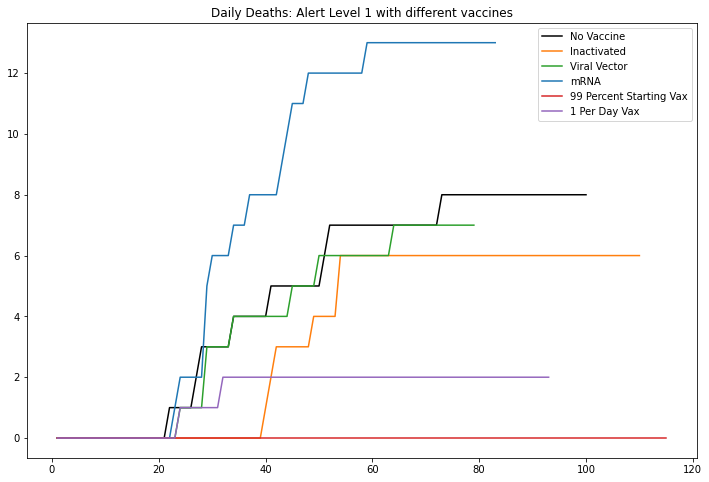

In [197]:
plt.figure(figsize=(12,8))

plt.plot(dd_days_D1NULL.days, dd_days_D1NULL.deaths, color="black")
plt.plot(dd_days_D1INAC.days, dd_days_D1INAC.deaths, color="tab:orange")
plt.plot(dd_days_D1VIRA.days, dd_days_D1VIRA.deaths, color="tab:green")
plt.plot(dd_days_D1MRNA.days, dd_days_D1MRNA.deaths, color="tab:blue")
plt.plot(dd_days_D45AVER99.days, dd_days_D45AVER99.deaths, color="tab:red")
plt.plot(dd_days_D45AVER1PD.days, dd_days_D45AVER1PD.deaths, color="tab:purple")


plt.legend(['No Vaccine', 'Inactivated', 'Viral Vector', 'mRNA', '99 Percent Starting Vax', '1 Per Day Vax'])

plt.title('Daily Deaths: Alert Level 1 with different vaccines')
plt.show()

In [142]:
dd_days_D1NULL.max() 1.75%

days      100
deaths      8
dtype: int64

In [144]:
dd_days_D1INAC.max() 1.5%

days      110
deaths      6
dtype: int64

In [202]:
percent_died = (dd_days_D45AVER99.deaths.max() / ac_days_D45AVER99.cases.max()) * 100

print(percent_died)

0.0


## Alert Levels

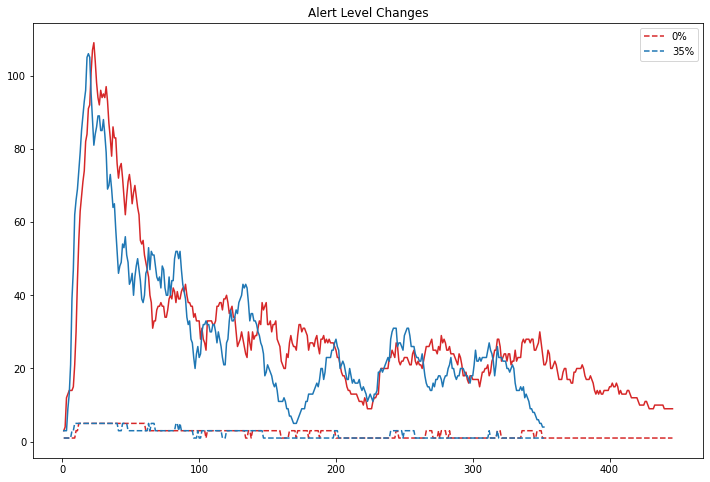

In [465]:
plt.figure(figsize=(12,8))

plt.plot(alert_days_DAUTONULL_Test1.days, alert_days_DAUTONULL_Test1.alert_level, '--', color="tab:red")
plt.plot(alert_days_DAUTONULL_Test2.days, alert_days_DAUTONULL_Test2.alert_level, '--', color="tab:blue")
plt.plot(ac_days_DAUTONULL_Test1.days, ac_days_DAUTONULL_Test1.cases, color="tab:red")
plt.plot(ac_days_DAUTONULL_Test2.days, ac_days_DAUTONULL_Test2.cases, color="tab:blue")

plt.legend(['0%', "35%"])

plt.title('Alert Level Changes')
plt.show()

# End of Code

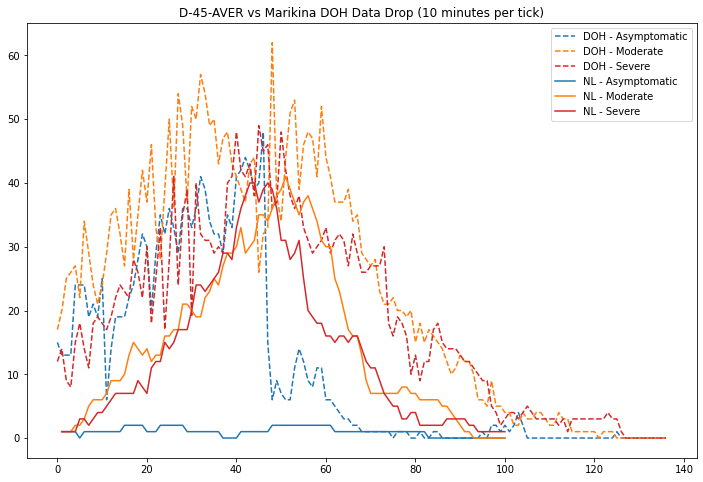

In [294]:
plt.figure(figsize=(12,8))
plt.plot(marikina_date.reset_index().index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mod,  '--', color="tab:orange")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_severe, '--', color="tab:red")

plt.plot(sod_days_ZZD45AVER.days, sod_days_ZZD45AVER.asym, color="tab:blue")
plt.plot(sod_days_ZZD45AVER.days, sod_days_ZZD45AVER.moderate, color="tab:orange")
plt.plot(sod_days_ZZD45AVER.days, sod_days_ZZD45AVER.severe, color="tab:red")


plt.legend(['DOH - Asymptomatic', 'DOH - Moderate', 'DOH - Severe',
            'NL - Asymptomatic', 'NL - Moderate', 'NL - Severe'])

plt.title('D-45-AVER vs Marikina DOH Data Drop (10 minutes per tick)')
plt.show()

# Fixing Cases Graph

Variables 

marikina_cases_date = Filtered From Aug 1 to Dec 15


In [27]:
# Convert dates from objects/strings to datetime
cases['DateRepConf'] = pd.to_datetime(cases['DateRepConf'])

# Filetering out to only Marikina
marikina_cases = cases[cases['CityMunRes'] == 'CITY OF MARIKINA']
marikina_cases = marikina_cases.reset_index().drop('index', axis=1)

In [28]:
marikina_cases_mask = (marikina_cases['DateRepConf'] >= start_date) & (marikina_cases['DateRepConf'] <= end_date)

In [29]:
marikina_cases_date = marikina_cases.loc[marikina_cases_mask].reset_index()
marikina_cases_date = marikina_cases_date.drop('index', axis=1)

In [31]:
marikina_cases_date.dtypes

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen                 object
DateResultRelease            object
DateRepConf          datetime64[ns]
DateDied                     object
DateRecover                  object
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset                    object
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [20]:
marikina_cases_date = marikina_cases_date.groupby('DateRepConf')

marikina_cases_date.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C1954666,27.0,25 to 29,FEMALE,2021-07-29,2021-07-30,2021-08-01,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,CONCEPCION DOS,PH137402012,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C92195662,33.0,30 to 34,FEMALE,2021-02-08,2021-02-08,2021-08-01,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,PARANG,PH137402007,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
2,C17024327,28.0,25 to 29,FEMALE,2021-07-30,2021-07-30,2021-08-01,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,NANGKA,PH137402006,RECOVERED,NO,2021-07-30,NO,"Health Status is ""Recovered"", but no Date Reco..."
3,C8060219,23.0,20 to 24,FEMALE,NaN,NaN,2021-08-01,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,MARIKINA HEIGHTS (CONCEPCION),PH137402013,RECOVERED,NO,NaN,NO,"Case has Lab Result, but Result Date is blank\..."
4,C19013651,35.0,35 to 39,MALE,2020-09-10,NaN,2021-08-01,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,CONCEPCION UNO,PH137402003,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
29,C40237130,33.0,30 to 34,MALE,2021-07-30,2021-07-30,2021-08-02,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,CONCEPCION DOS,PH137402012,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
30,C10011950,65.0,65 to 69,MALE,2021-07-29,2021-07-30,2021-08-02,NaN,NaN,RECOVERED,NO,NCR,NCR,CITY OF MARIKINA,PH137402000,NaN,NaN,RECOVERED,NO,2021-07-05,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
31,C62155510,28.0,25 to 29,MALE,2021-07-31,2021-08-01,2021-08-02,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,MALANDAY,PH137402005,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
32,C43316138,55.0,55 to 59,FEMALE,NaN,NaN,2021-08-02,NaN,2021-08-13,RECOVERED,YES,NCR,NCR,CITY OF MARIKINA,PH137402000,MARIKINA HEIGHTS (CONCEPCION),PH137402013,RECOVERED,YES,NaN,NO,NaN
33,C67180337,34.0,30 to 34,FEMALE,2021-07-09,NaN,2021-08-02,NaN,NaN,RECOVERED,NaN,NCR,NCR,CITY OF MARIKINA,PH137402000,TUMANA,PH137402016,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."


In [26]:
marikina_cases_date.dtypes

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
DateRepConf,,,,,,,,,,,,,,,,,,,,,
2021-08-01,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-02,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-03,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-04,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-05,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-06,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-07,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-08,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
2021-08-09,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


In [ ]:
plt.plot(marikina_date.reset_index().index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mod,  '--', color="tab:orange")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mild, '--', color="tab:green")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_severe, '--', color="tab:red")